MAC waves

Illustrate the use of a package in Julia for the calculation of MAC waves

In [1]:
using LinearAlgebra
using Arpack
using SparseArrays
using Interpolations
using Statistics
using Plots
include("ProjectFiles.jl");


In [2]:
# define some model parameters
H = 140.0     # thickness of layer (km)
Np = 0.92     # dimensionless stratification Np = N/Omega
m = 0;        # angular order 
Br = 0.62      # radial magnetic field (mT) 
sectoyear = 365.25 * 24 * 60 * 60;
omega = 0.7292e-4;   # rotation rate

In [4]:
# compute zonal MAC waves
T = 20.0;   # nominal period  
r,x,d,v = macWave(120,500,Br,Np,H,T);
period = 2 * pi / ( (d[1]/1im) * omega * sectoyear);
println(" Period = ",real(period),"   Q = ",-0.5*real(period)/imag(period))

w1 1.417861085523085e-5 w2 2.455807438200744e-5 w3 3.473036185680219e-5
 Period = 21.277332964678443   Q = 4.400740724461704


The velocity field varies with colatitude

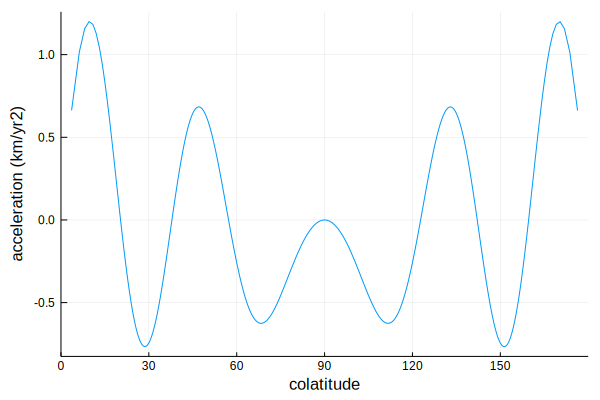

In [5]:
vphi, bphi = velocityphi(r,x,Br,v[:,1],d[1])
theta = acos.(x) * 180/pi;     # colatitude (degrees)
plot(theta,1.2*real(vphi)/maximum(real(vphi)),xlim=(0,180),xlabel="colatitude",ylabel="acceleration (km/yr2)",label=nothing)